In [1]:
import camb
import numpy as np
import matplotlib.pyplot as plt
import scipy
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)

In [2]:
t_in = 1
zR = 0
a0 = 1+zR

Om0 = 0.3147
Ol0 = 1-Om0

c = 1
h = 0.6737
H0_Mpc = c*h/2997.9

G = 1
kappa = 8*np.pi*G

a_in = a0 * ( Om0 / Ol0 )**(1/3) * np.sinh( 3 * H0_Mpc * np.sqrt(Ol0) * t_in / 2 )**(2/3)
z_in = -1 +(a0/a_in)
L_pert = 1821
LphyIN = L_pert*(1+zR)/(1+z_in)
print(z_in, LphyIN)

302.53397248862854 5.999328460896486


In [3]:
Om_in = Om0 / ( Om0 + ( 1 - Om0 )/(1 + z_in)**3 )
H_in = H0_Mpc * np.sqrt( Om0 * ( 1+z_in )**(3) + (1 - Om0) )
rho_bar = (3*Om_in*H_in**2)/kappa
print(Om_in, H_in, rho_bar)

0.9999999221314589 0.6666666839707874 0.05305164632028022


In [4]:
H0_kmsMpc = 100*h
baryon_fraction = 0.1528
Omega_baryon_h2 = Om0*baryon_fraction*h**2
Omega_cdm_h2 = Om0*(1-baryon_fraction)*h**2
Omega_curvature = 0
sum_neutrino_mass = 0.06  #eV
optical_depth = 0.06

In [5]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=H0_kmsMpc,
                   ombh2=Omega_baryon_h2,
                   omch2=Omega_cdm_h2,
                   omk=Omega_curvature,
                   mnu=sum_neutrino_mass,
                   tau=optical_depth);
Zs = [z_in, z_in/4, z_in/16, z_in/64, 0]
pars.set_matter_power(redshifts=Zs, kmax=2.0);
pars.NonLinear = camb.model.NonLinear_none
#Set up W(z) window functions, later labelled W1, W2. Gaussian here.
pars.SourceWindows = [
    camb.sources.GaussianSourceWindow(redshift=0.17, source_type='counts', bias=1.2, sigma=0.04, dlog10Ndm=-0.2),
    camb.sources.GaussianSourceWindow(redshift=0.5, source_type='lensing', sigma=0.07)]

results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

In [6]:
Ls = [5, LphyIN, 8,  10, 50, 100, 300, 500, 1000, L_pert]
sigma = results.get_sigmaR(Ls)
#print(sigma)

In [7]:
results.get_sigma8_0(), results.get_sigma8()

(0.797883493823403,
 array([0.00354051, 0.01350565, 0.05134056, 0.17711213, 0.79788349]))

$\langle \delta\rangle^2=\frac{\sigma^2}{\bar{\rho}^2}$

In [8]:
delta = sigma/rho_bar

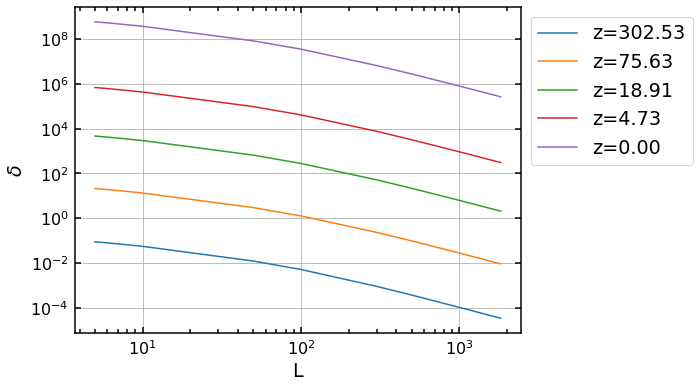

In [9]:
for idx, zi in enumerate(Zs):
    Om_in = Om0 / ( Om0 + ( 1 - Om0 )/(1 + zi)**3 )
    H_in = H0_Mpc * np.sqrt( Om0 * ( 1+zi )**(3) + (1 - Om0) )
    rho_bar = (3*Om_in*H_in**2)/kappa
    plt.loglog(Ls, sigma[idx]/rho_bar, label='z={:.2f}'.format(zi))
plt.grid()
plt.xlabel('L')
plt.ylabel(r'$\delta$')
plt.legend(bbox_to_anchor=(1,1))

In [11]:
delta_want = 0.03
k = 2*np.pi/L_pert
F = (Om_in**(6/11)) + (3/2)*Om_in

iFH2 = 1/(F*(H_in**2))
dRcfac = 3*(k**2)/(a_in**2)

A = delta_want/(dRcfac*iFH2)
print(A)

d = A*dRcfac*iFH2
print(d)

0.010129850333747789
0.03
